In [44]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 15 ms


In [19]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df["PRICE"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


time: 657 ms


In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

time: 344 ms


In [23]:
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error",cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("neg_mse_socres : {}".format(neg_mse_scores))
print("rmse_scores : {}".format(rmse_scores))
print("avg_rmse : {}".format(avg_rmse))

neg_mse_socres : [-6.36823308e+02 -3.54071383e+04 -5.86376981e+03 -6.33569086e+03
 -9.44576651e+05]
rmse_scores : [ 25.23535828 188.1678461   76.57525587  79.59705309 971.89333332]
avg_rmse : 268.2937693325437
time: 1.06 s


In [25]:
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error",cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("### alpha = {} ###".format(alpha))
    print("neg_mse_socres : {}".format(neg_mse_scores))
    print("rmse_scores : {}".format(rmse_scores))
    print("avg_rmse : {}\n".format(avg_rmse))

### alpha = 0 ###
neg_mse_socres : [-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
rmse_scores : [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
avg_rmse : 5.828658946215803

### alpha = 0.1 ###
neg_mse_socres : [-12.31966805 -25.19800734 -32.43466024 -80.70282254 -32.88006851]
rmse_scores : [3.50993847 5.01976168 5.69514357 8.98347497 5.73411445]
avg_rmse : 5.788486627032408

### alpha = 1 ###
neg_mse_socres : [-11.7110334  -23.58316804 -29.69339407 -80.22988232 -31.11617767]
rmse_scores : [3.42213872 4.85625041 5.44916453 8.9571135  5.57818767]
avg_rmse : 5.652570965613544

### alpha = 10 ###
neg_mse_socres : [-11.4217962  -24.29446706 -28.14355069 -74.59916618 -28.51714218]
rmse_scores : [3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
avg_rmse : 5.518166280868972

### alpha = 100 ###
neg_mse_socres : [-12.8247449  -27.27923137 -34.67968877 -52.69431476 -22.05052994]
rmse_scores : [3.5811653  5.22295236 5.88894632 7.25908498 4.69579918]
avg_rmse :

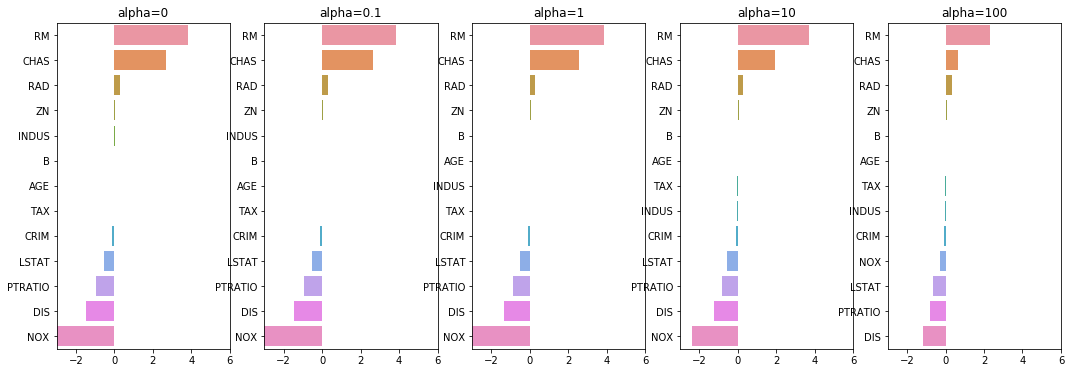

time: 1.16 s


In [28]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    coeff = pd.Series(ridge.coef_, index=X.columns)
    colname="alpha="+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

In [40]:
alphas = [0.07, 0.1, 0.5, 1, 3]
def get_linear_reg_eval(model_name, params=None, X_data = None, y_target=None):
    fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

    print("#### {} ####".format(model_name))
    for pos, param in enumerate(params):
        if model_name == "Ridge": model = Ridge(alpha=param)
        elif model_name == "Lasso": model= Lasso(alpha=param)
        elif model_name == "ElasticNet": model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        neg_mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error",cv = 5)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        print("### alpha = {} ###".format(param))
        print("neg_mse_socres : {}".format(neg_mse_scores))
        print("rmse_scores : {}".format(rmse_scores))
        print("avg_rmse : {}\n".format(avg_rmse))
        
        model.fit(X_data, y_target)
        coeff = pd.Series(model.coef_, index=X_data.columns)
        colname="alpha="+str(param)
        coeff_df[colname] = coeff

        coeff = coeff.sort_values(ascending=False)
        axs[pos].set_title(colname)
        axs[pos].set_xlim(-3, 6)
        sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    plt.show()

time: 16 ms


#### Lasso ####
### alpha = 0.07 ###
neg_mse_socres : [-11.16910221 -24.38034919 -28.53702903 -80.49005513 -29.90037414]
rmse_scores : [3.34202068 4.93764612 5.34200609 8.971625   5.46812346]
avg_rmse : 5.612284267526675

### alpha = 0.1 ###
neg_mse_socres : [-11.22162227 -24.34502474 -29.42629614 -79.36695204 -29.79226639]
rmse_scores : [3.34986899 4.93406777 5.42460101 8.90881317 5.45822924]
avg_rmse : 5.615116035266936

### alpha = 0.5 ###
neg_mse_socres : [-12.46638011 -27.59244617 -42.25030628 -67.1976593  -23.66382986]
rmse_scores : [3.53077613 5.25285124 6.50002356 8.19741784 4.86454827]
avg_rmse : 5.6691234095948975

### alpha = 1 ###
neg_mse_socres : [-15.14131994 -33.33259513 -53.29272438 -56.60390882 -19.28735282]
rmse_scores : [3.8911849  5.77343876 7.3001866  7.52355693 4.39173688]
avg_rmse : 5.776020813823376

### alpha = 3 ###
neg_mse_socres : [-22.75126745 -36.89161355 -71.60006937 -52.54383435 -19.26986538]
rmse_scores : [4.76982887 6.07384668 8.46168242 7.2487126  4.3

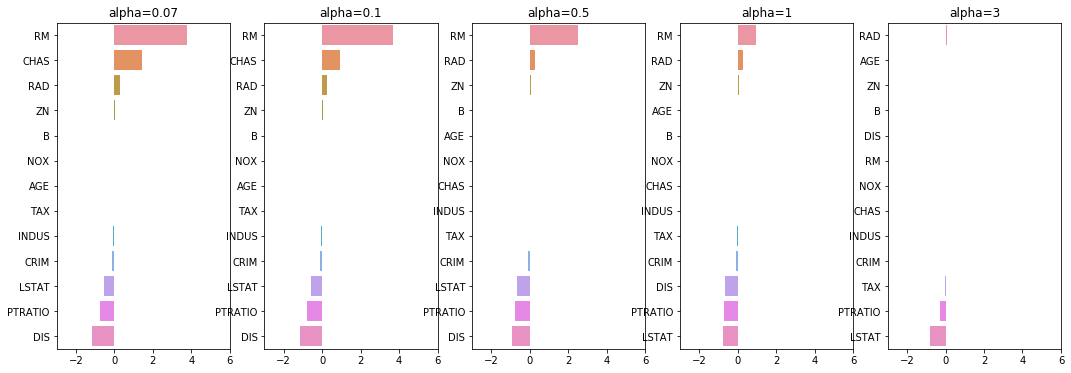

time: 1.03 s


In [41]:
get_linear_reg_eval("Lasso", params=alphas, X_data=X, y_target=y)

#### ElasticNet ####
### alpha = 0.07 ###
neg_mse_socres : [-11.396868   -24.60809082 -29.00034402 -74.97826816 -28.38222104]
rmse_scores : [3.37592476 4.96065427 5.38519675 8.65899926 5.3274967 ]
avg_rmse : 5.541654347348141

### alpha = 0.1 ###
neg_mse_socres : [-11.50417462 -24.77318085 -29.99825589 -72.64550936 -27.67071155]
rmse_scores : [3.39178045 4.9772664  5.47706636 8.5232335  5.26029577]
avg_rmse : 5.525928496294909

### alpha = 0.5 ###
neg_mse_socres : [-13.14287005 -28.19078922 -40.67323252 -54.66410214 -21.41708059]
rmse_scores : [3.62530965 5.3094999  6.37755694 7.39351758 4.62785918]
avg_rmse : 5.466748649445586

### alpha = 1 ###
neg_mse_socres : [-14.91482795 -31.21250584 -50.88245623 -49.16530416 -19.27731014]
rmse_scores : [3.86197203 5.58681536 7.13319397 7.0117975  4.39059337]
avg_rmse : 5.596874445109748

### alpha = 3 ###
neg_mse_socres : [-21.21191424 -35.60282378 -68.37448106 -50.85409968 -19.08000269]
rmse_scores : [4.6056394  5.96681018 8.26888633 7.13120605

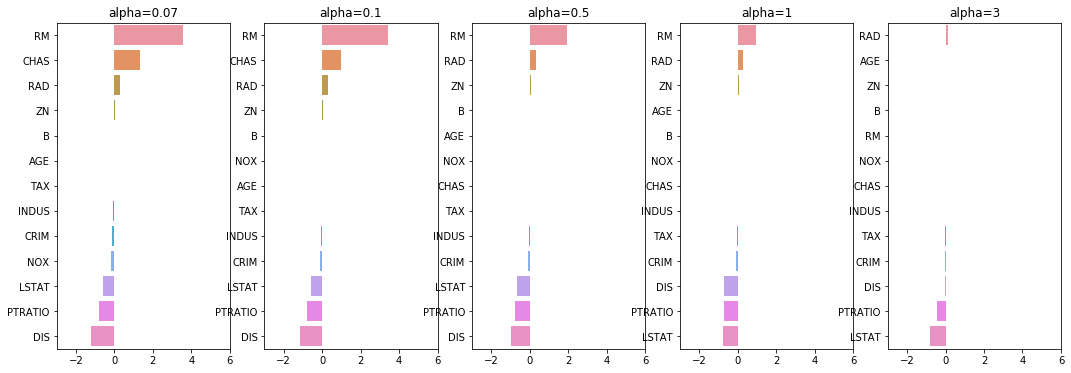

time: 1.06 s


In [45]:
get_linear_reg_eval("ElasticNet", params=alphas, X_data=X, y_target=y)